In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
Retail_sales = pd.read_csv(r'C:\Users\vinic\OneDrive\Python\Arquivos\Online Retail.csv', delimiter=';')
Retail_sales = Retail_sales.dropna(axis=0)
#Tratando Brevemente os dados.
Retail_sales['InvoiceDate'] = pd.to_datetime(Retail_sales['InvoiceDate'], format='%d/%m/%Y %H:%M')
Retail_sales['CustomerID'] = Retail_sales['CustomerID'].astype(str)
#Aqui transformei a informação de consumidor (que é um número) em texto para garantir que não tenhamos problemas.
Retail_sales['UnitPrice'] = Retail_sales['UnitPrice'].str.replace(',', '.')
Retail_sales['UnitPrice'] = Retail_sales['UnitPrice'].astype(float)
#Os valores de venda estavam com decimal em vírgula, alterei pra ponto.



In [12]:
#Quero meu KMeans com 3 informações: Frequência de compra, valor total de compra
#e tempo desde a última compra;

#Somando todas as compras por cliente contando os valores únicos de Invoices:
freq = Retail_sales.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
freq.columns = ['CustomerID', 'Purchase_frequency']

#Calculando o valor total do cliente:
Total_value = Retail_sales.groupby('CustomerID')['UnitPrice'].sum().reset_index()
Total_value.columns = ['CustomerID', 'Value']

#Calculando o tempo desde a última compra em dias:
LastPurchase = Retail_sales.groupby('CustomerID')['InvoiceDate'].max().reset_index()
LastPurchase.columns = ['CustomerID', 'Last_purchase']
LastPurchase['Time_since_purchase'] = (pd.to_datetime('today') - LastPurchase['Last_purchase']).dt.days

#Juntando as colunas em um novo DataFrame:
Final_retail_sales = pd.merge(freq, Total_value, on='CustomerID')
Final_retail_sales = pd.merge(Final_retail_sales, LastPurchase, on='CustomerID')

In [ ]:
#Selecionando as colunas que desejo que sejam utilizadas no KMeans:
Data_features = Final_retail_sales[['Purchase_frequency', 'Value', 'Time_since_purchase']]

#Características da segmentação:
#Quero 3 clusters diferentes, baseados em pontos aleatórios centrais
#random_state=0 é o que garante que os pontos aleatórios permaneçam os mesmos
#o que torna o código reproduzível.
kmeans = KMeans(n_clusters=3, random_state=0).fit(Data_features)
Data_features['Segment'] = kmeans.labels_
#Transformando os kmeans.labels_ em nomenclaturas da minha escolha:
Data_features['Segment'] = Data_features['Segment'].replace({0:'A',2:'B',1:'C'})


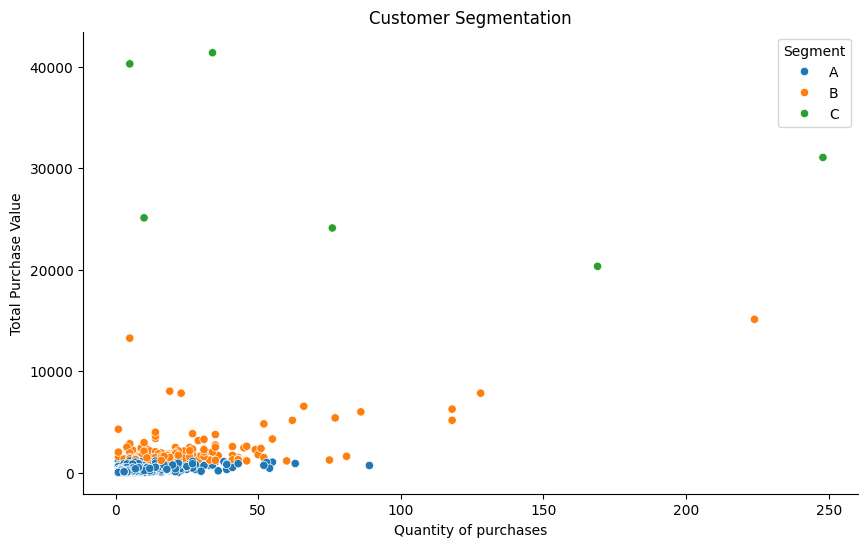

In [41]:

#Transformando isso em uma visualização para entender melhor o que foi feito:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data_features, x='Purchase_frequency', y='Value', hue='Segment', palette='tab10')
plt.title('Customer Segmentation')
plt.xlabel('Quantity of purchases')
plt.ylabel('Total Purchase Value')
sns.despine(right=True)
plt.show()


In [15]:
#Separando os clusters em 3 DataFrames diferentes
#O que em uma situação da vida real, seria como separar 3 bases de clientes para entrar em contato.abs

#Clientes tipo "A"
ACustomers = Data_features[Data_features['Segment'] == 'A']
#Clientes tipo "B"
BCustomers = Data_features[Data_features['Segment'] == 'B']
#Clientes tipo "C"
CCustomers = Data_features[Data_features['Segment'] == 'C']